In [1]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# enabling datatable an interactive table formatter
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
#  importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pyproj
import math
import folium

import warnings
warnings.filterwarnings("ignore")

In [3]:
# loadinng the data

data = pd.read_csv('/content/drive/MyDrive/Uber_Fare_Prediction/final.csv')

# transposed summary of the first 5 observations
data.head().T

,0,1,2,3,4
User ID,KHVrEVlD,lPxIuEri,gsVN8JLS,9I7kWFgd,8QN5ZaGN
User Name,Kimberly Adams,Justin Tapia,Elizabeth Lopez,Steven Wilson,Alexander Andrews
Driver Name,Amy Butler,Hannah Zimmerman,Amanda Jackson,Amy Horn,Cassandra Larson
Car Condition,Very Good,Excellent,Bad,Very Good,Bad
Weather,windy,cloudy,stormy,stormy,stormy
Traffic Condition,Congested Traffic,Flow Traffic,Congested Traffic,Flow Traffic,Congested Traffic
key,2009-06-15 17:26:21.0000001,2010-01-05 16:52:16.0000002,2011-08-18 00:35:00.00000049,2012-04-21 04:30:42.0000001,2010-03-09 07:51:00.000000135
fare_amount,4.5,16.9,5.7,7.7,5.3
pickup_datetime,2009-06-15 17:26:21,2010-01-05 16:52:16,2011-08-18 00:35:00,2012-04-21 04:30:42,2010-03-09 07:51:00
pickup_longitude,-1.288826,-1.291824,-1.291242,-1.291319,-1.290987


### Data Exploration

In [6]:
# Dimension of the Data
data.shape

(500000, 26)

In [7]:
# summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [8]:
# getting the number of unique values by each column
data.nunique()

User ID              500000
User Name            221675
Driver Name          221700
Car Condition             4
Weather                   5
Traffic Condition         3
key                  500000
fare_amount            1688
pickup_datetime      461206
pickup_longitude      95037
pickup_latitude      119115
dropoff_longitude    108283
dropoff_latitude     135053
passenger_count           7
hour                     24
day                      31
month                    12
weekday                   7
year                      7
jfk_dist             490613
ewr_dist             490613
lga_dist             490613
sol_dist             490613
nyc_dist             490613
distance             485705
bearing              485636
dtype: int64

In [9]:
# checking for and dropping null values
data.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [10]:
# dropping null values
data.dropna(inplace = True)

In [11]:
# checking for and dropping duplicates
data.duplicated().sum()

0

In [16]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-1.265714,0.696742,-1.265755,0.696675,1.683445,13.510843,15.684239,6.268617,3.042020,2011.739129,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916069,0.206934,0.140906,0.205903,0.128997,1.307391,6.511596,8.681092,3.437798,1.949243,1.860897,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [152]:
# dropping useless columns
data1 = data.drop(['User ID', 'User Name', 'Driver Name','key','hour', 'day','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'month', 'weekday','bearing'], axis =1)

In [153]:
# Convert the float date column to a datetime object
data1['pickup_datetime'] = pd.to_datetime(data1['pickup_datetime'])  # Assuming the float values represent UNIX timestamps

# Extract day, time, and month into separate columns
data1['day'] = data1['pickup_datetime'].dt.day
data1['day_of_week'] = data1['pickup_datetime'].dt.day_name()
data1['time'] = data1['pickup_datetime'].dt.time
data1['month'] = data1['pickup_datetime'].dt.month_name()

data1.drop('pickup_datetime',axis=1, inplace = True)


In [154]:
# categorizing the times
# Creating a function to categorize the times
def categorize_time(time):
    hour = time.hour
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Applying the categorization function to update the 'time' column
data1['time'] = data1['time'].apply(categorize_time)

In [155]:
# reindexing the data1 columns
data1 = data1[['year', 'month','day', 'day_of_week', 'time', 'passenger_count','Car Condition', 'Weather', 'Traffic Condition', 'distance',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist','fare_amount']]


In [156]:
# creating another instance of the data1 data
data2 = data1.copy()

# exploring the outlook of the data
data2.sample(7)

,year,month,day,day_of_week,time,passenger_count,Car Condition,Weather,Traffic Condition,distance,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,fare_amount
129981,2013,October,8,Tuesday,Morning,1,Excellent,stormy,Flow Traffic,12.517141,13.737028,62.597716,21.382410,42.322655,36.151748,30.50
258465,2014,December,18,Thursday,Afternoon,2,Very Good,cloudy,Congested Traffic,19.449744,21.227989,48.491117,27.534305,28.759889,22.198706,52.00
174166,2010,May,22,Saturday,Afternoon,4,Good,windy,Flow Traffic,0.000000,194.135346,228.848102,179.846707,214.062204,205.593284,9.30
79177,2011,January,4,Tuesday,Morning,1,Excellent,cloudy,Dense Traffic,3.174693,42.721123,34.247770,19.296406,17.730004,9.669445,9.30
26356,2010,October,8,Friday,Morning,1,Bad,sunny,Flow Traffic,21.077659,23.513393,48.541591,26.690002,30.388585,24.333910,49.57
265442,2015,May,9,Saturday,Afternoon,1,Good,sunny,Flow Traffic,1.508079,44.360362,35.606328,18.563835,20.262463,12.431855,7.50
92197,2013,April,21,Sunday,Night,1,Good,sunny,Flow Traffic,3.654411,43.963313,32.605522,20.998425,16.568469,8.948512,11.50


In [157]:
# value_counts
columns = ['year', 'month', 'day', 'day_of_week', 'time', 'passenger_count',
       'Car Condition', 'Weather', 'Traffic Condition', ]

for column in columns:
    print(f"The value counts of {column}:\n")
    print(data2[column].value_counts().head(7))
    print("*"*30)

The value counts of year:

2012    80222
2011    79528
2013    78033
2009    77002
2010    75791
2014    74608
2015    34811
Name: year, dtype: int64
******************************
The value counts of month:

May         46733
March       46714
April       45959
June        44827
January     44547
February    42454
October     40551
Name: month, dtype: int64
******************************
The value counts of day:

13    17246
12    17173
16    17088
11    17037
9     16963
15    16957
20    16909
Name: day, dtype: int64
******************************
The value counts of day_of_week:

Friday       77224
Saturday     76212
Thursday     74776
Wednesday    72230
Tuesday      69929
Sunday       65387
Monday       64237
Name: day_of_week, dtype: int64
******************************
The value counts of time:

Evening      171958
Afternoon    143678
Morning      120487
Night         63872
Name: time, dtype: int64
******************************
The value counts of passenger_count:

1    346009


### Analysis

In [158]:
# feature extraction
from sklearn.preprocessing import LabelEncoder, StandardScaler

# defining the categorical and label encoding object columns
# Define the order of the categories
month_order = [ 'January', 'February', 'March', 'April', 'May','June', 'July','August', 'September', 'October','November','December']
Day_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday']
time_order = [ 'Morning', 'Afternoon', 'Evening', 'Night']
car_order = ['Bad', 'Good', 'Very Good', 'Excellent']
weather_order = ['sunny', 'windy', 'cloudy', 'rainy', 'stormy']
traffic_order = ['Flow Traffic', 'Dense Traffic', 'Congested Traffic']

column_orders = [month_order, Day_week_order, time_order, car_order, weather_order, traffic_order]

col_to_order = ['month', 'day_of_week', 'time', 'Car Condition', 'Weather', 'Traffic Condition']

# Initialize and fit LabelEncoder to all columns
label_encoders = {}

for col, order in zip(col_to_order, column_orders):
    label_encoder = LabelEncoder()
    label_encoder.fit(order)
    label_encoders[col] = label_encoder

# Encode the categorical columns
for col in col_to_order:
    data2[col] = label_encoders[col].transform(data2[col])

In [159]:
data2.sample(7)

,year,month,day,day_of_week,time,passenger_count,Car Condition,Weather,Traffic Condition,distance,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,fare_amount
412332,2010,9,17,6,1,1,2,2,2,8.364562,35.134934,38.730740,16.653387,19.632039,11.508687,19.3
362682,2010,10,29,0,1,2,2,0,1,0.030640,42.858747,39.080752,15.164897,23.207090,15.035656,14.1
195703,2015,7,29,3,2,1,0,3,2,1.317215,42.837785,35.089013,18.526547,18.853964,10.783031,5.5
164032,2015,0,22,6,2,1,2,1,2,2.631076,39.476394,30.567552,24.314638,11.069198,3.753397,12.5
334898,2012,4,5,4,1,1,0,0,2,2.642156,43.433812,33.334858,20.182216,17.154430,9.309217,8.9
25406,2009,1,7,0,0,1,3,0,1,4.785206,40.717983,31.234223,22.930082,12.436413,5.042973,12.5
428624,2014,11,12,0,1,1,0,0,1,2.445012,3.974487,64.867783,30.820151,44.082948,39.275383,10.0


In [160]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499995 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               499995 non-null  int64  
 1   month              499995 non-null  int64  
 2   day                499995 non-null  int64  
 3   day_of_week        499995 non-null  int64  
 4   time               499995 non-null  int64  
 5   passenger_count    499995 non-null  int64  
 6   Car Condition      499995 non-null  int64  
 7   Weather            499995 non-null  int64  
 8   Traffic Condition  499995 non-null  int64  
 9   distance           499995 non-null  float64
 10  jfk_dist           499995 non-null  float64
 11  ewr_dist           499995 non-null  float64
 12  lga_dist           499995 non-null  float64
 13  sol_dist           499995 non-null  float64
 14  nyc_dist           499995 non-null  float64
 15  fare_amount        499995 non-null  float64
dtypes:

### Removing Outliers

In [177]:
# function to remove the outliers and create a dataframe
def remove_outliers(df, multiplier=1.5):
    # Filter columns with float data types
    float_columns = df.select_dtypes(include=['float']).columns

    # Create a copy of the DataFrame
    df1 = df.copy()

    # Iterate through float columns and remove outliers
    for column in float_columns:
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - multiplier * IQR
        upper_fence = Q3 + multiplier * IQR

        # Remove outliers
        df1 = df1[(df1[column] >= lower_fence) & (df1[column] <= upper_fence)]

    return df1

data2 = remove_outliers(data2)

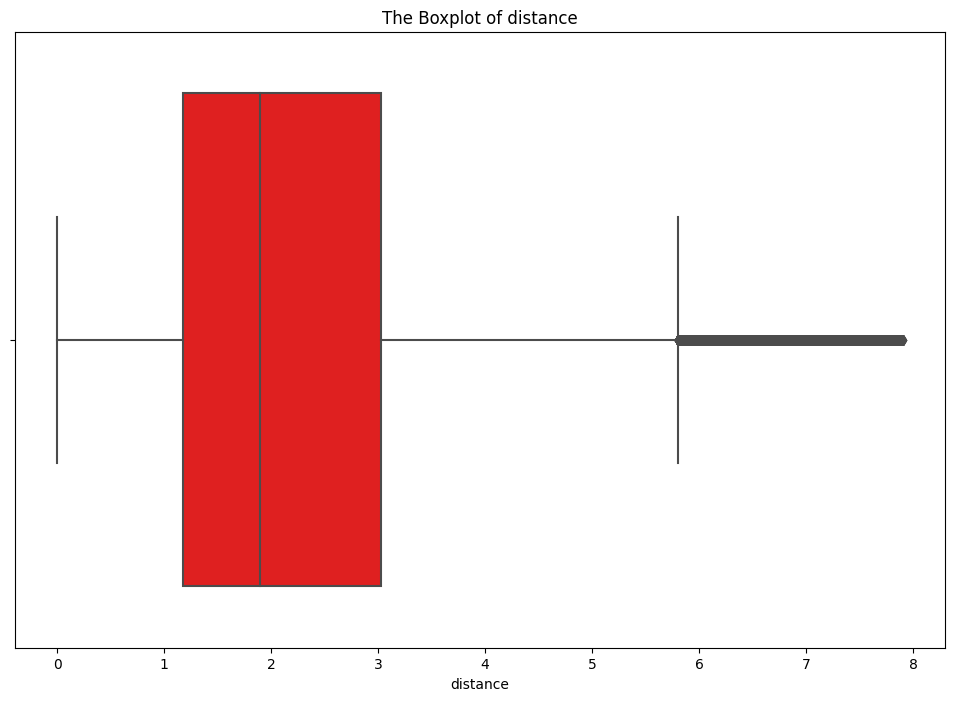

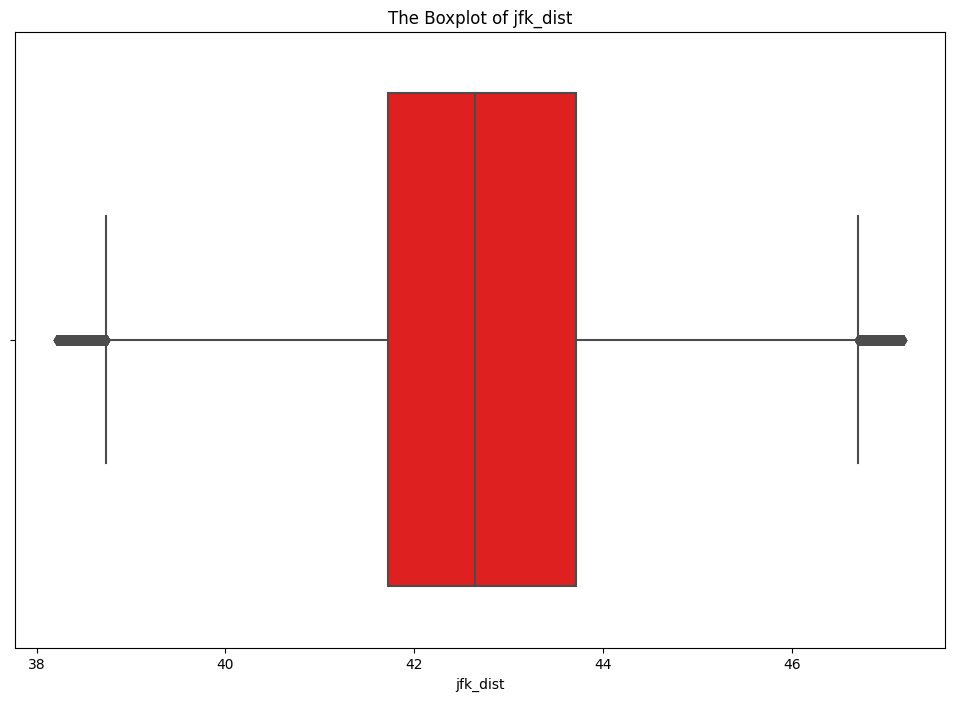

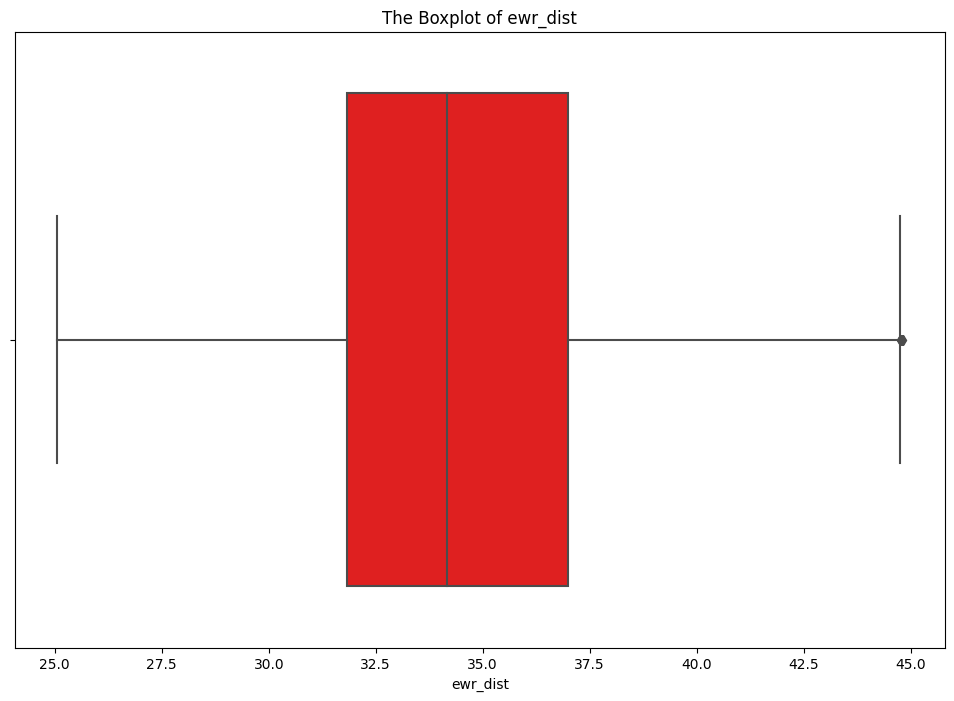

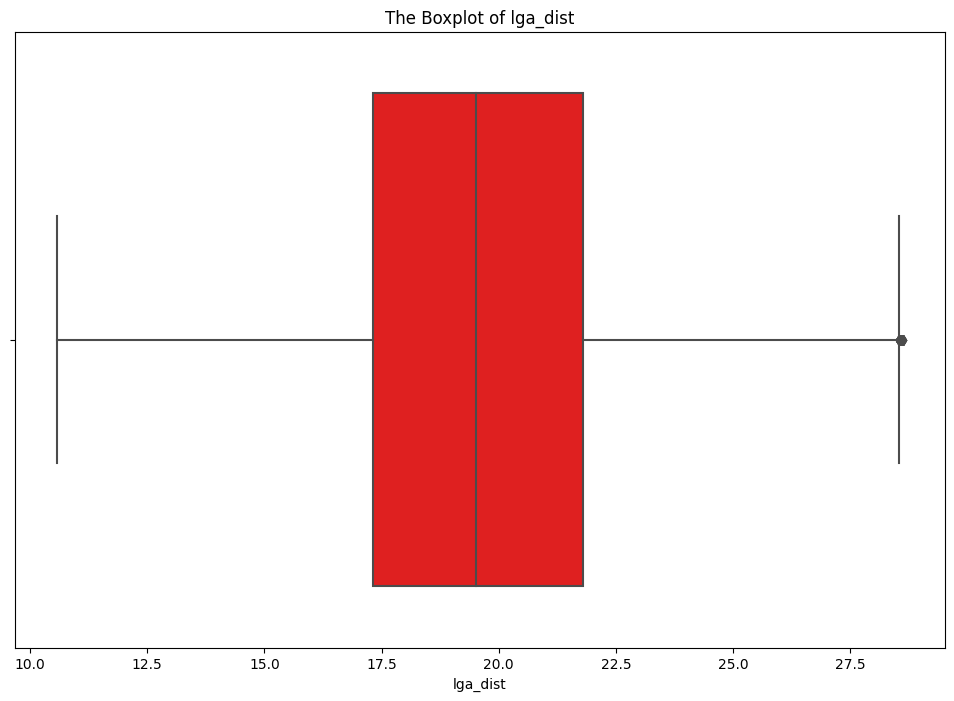

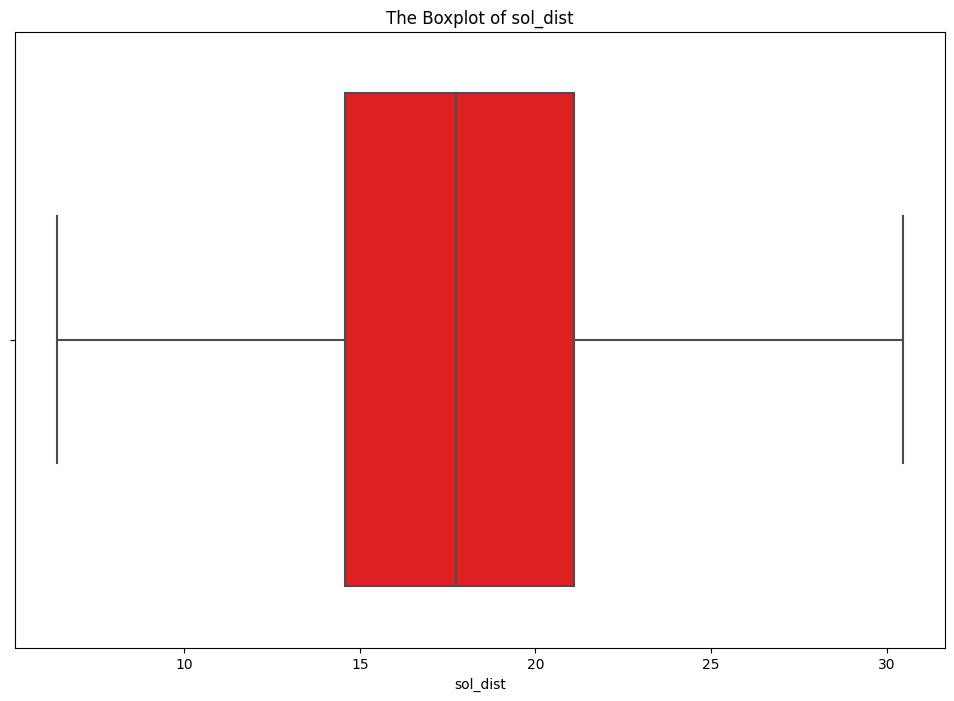

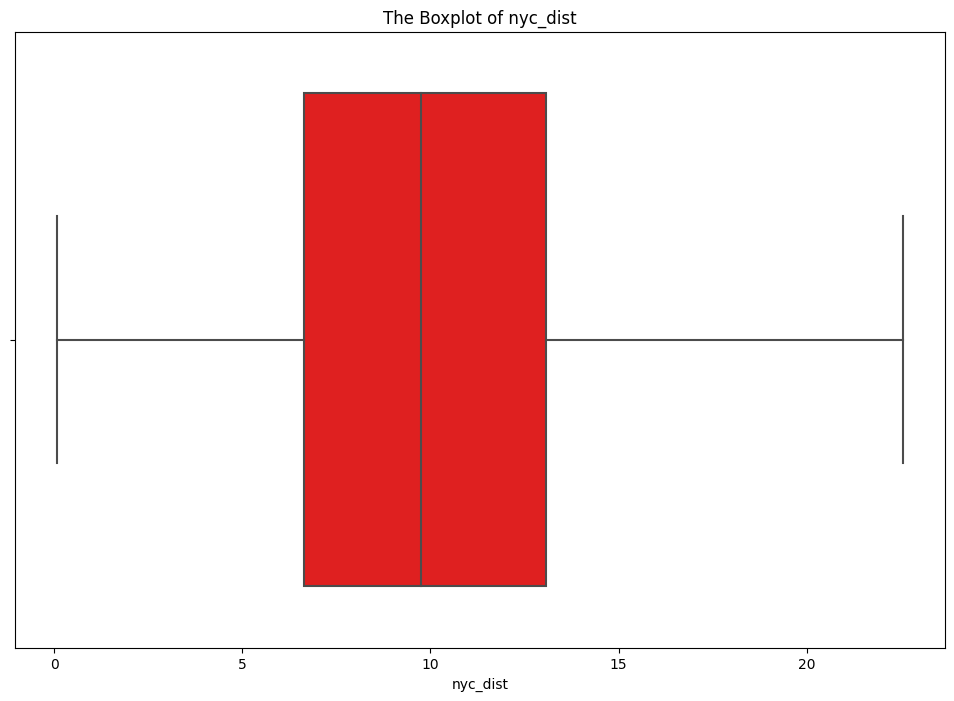

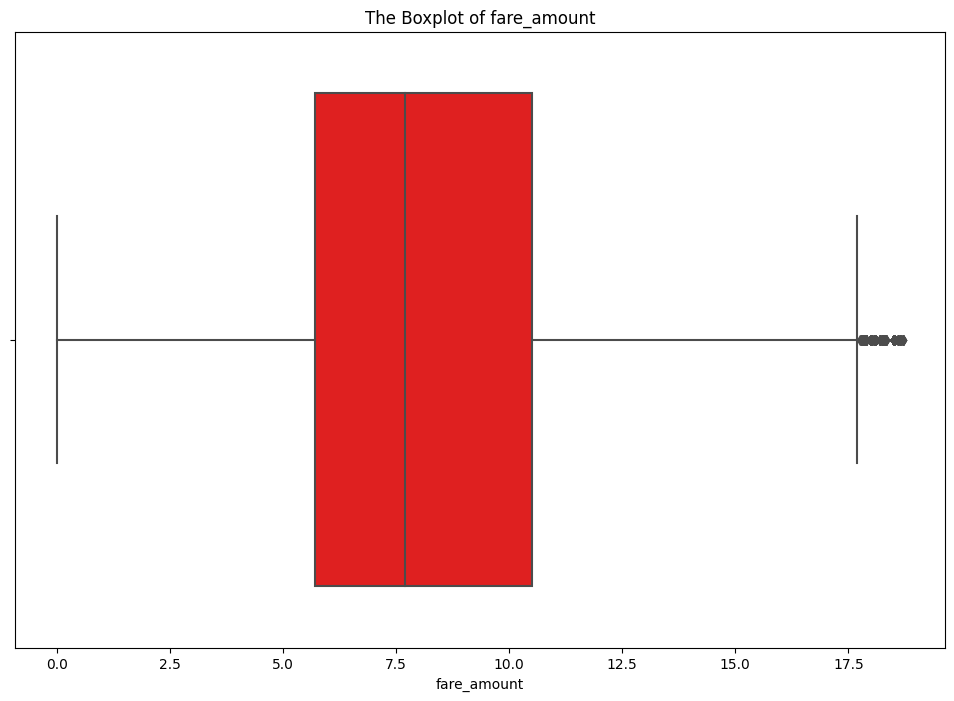

In [178]:
# boxplot after outlier removal
float_columns = data2.select_dtypes(include = "float").columns

for column in float_columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x = column , data = data2, color = "r")
    plt.title(f"The Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

In [179]:
# standardizing the data
# Standardize the features
scaler = StandardScaler()
standard_array = scaler.fit_transform(data2)

# Create a DataFrame with the standardized data
data3 = pd.DataFrame(standard_array, columns=['year', 'month', 'day', 'day_of_week', 'time', 'passenger_count',
       'Car Condition', 'Weather', 'Traffic Condition', 'distance', 'jfk_dist',
       'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'fare_amount'])


<Axes: >

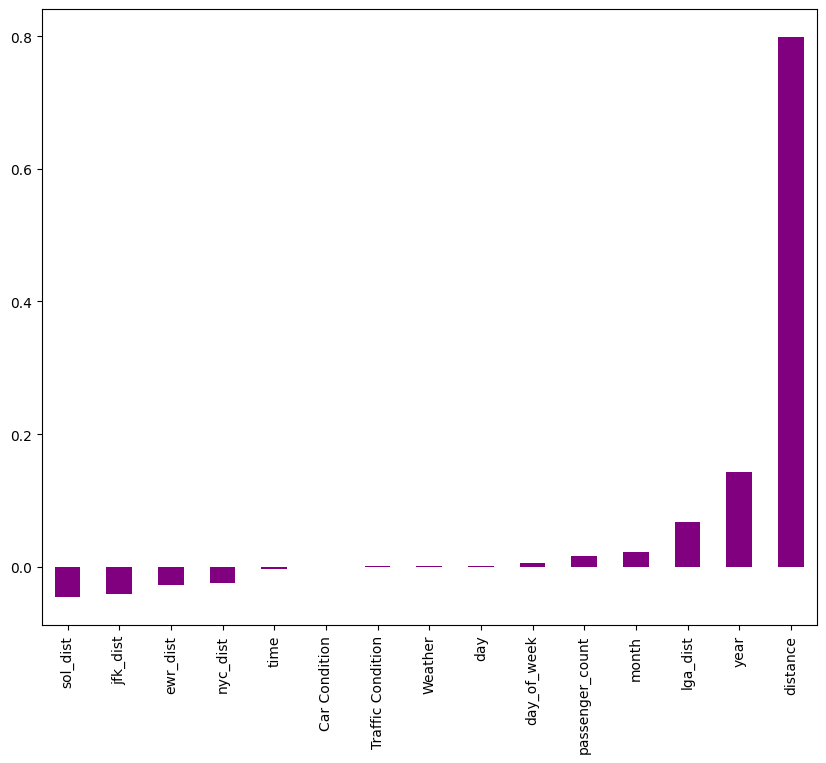

In [180]:
plt.figure(figsize=(10,8))
data3.corr()['fare_amount'][:-1].sort_values().plot(kind='bar', color = "purple")

### Train Test Split

In [182]:
# loading the train test split library
from sklearn.model_selection import train_test_split

In [183]:
# separating teh trget from the othe feature columns
x = data3.drop("fare_amount", axis= 1)
y = data3["fare_amount"]

# spliting the data to the test and train one
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=42)

#### Decision Tree Regressor Model

In [184]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
#training the model
dt.fit(x_train,y_train)
#train accuracy
dt.score(x_train,y_train)

1.0

In [185]:
#predicting the test set
dt_pred = dt.predict(x_test)

#### Random Forest Regressor Model

In [186]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
#training the model
rf.fit(x_train,y_train)
#train accuracy
rf.score(x_train,y_train)

0.9617792320248891

In [191]:
#predicting the test set
rf_pred = rf.predict(x_test)

### Model Evaluation

In [187]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

#### Decision Tree Performance

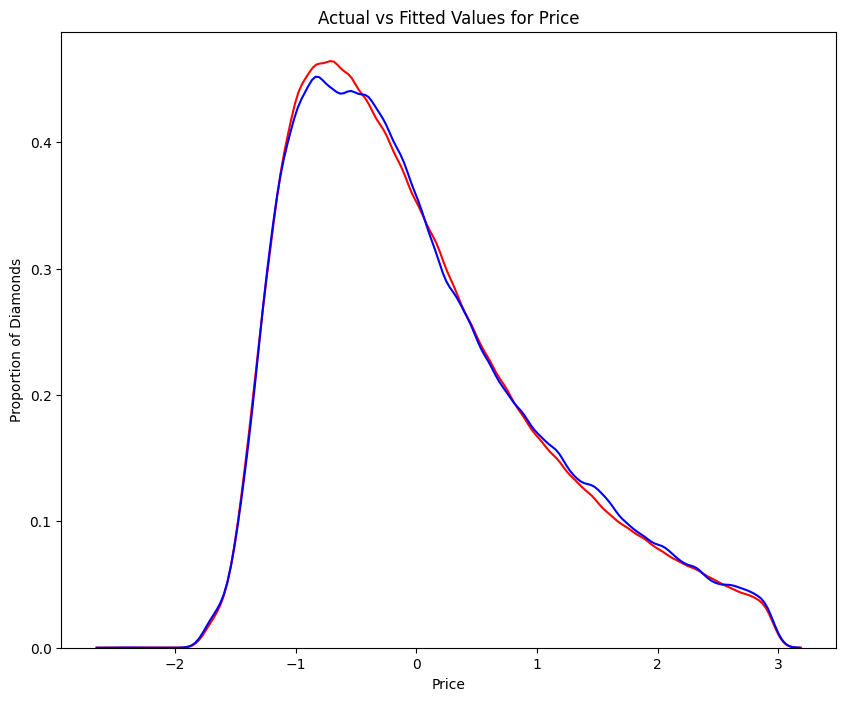

In [188]:
#distribution plot for actual and predicted values
plt.figure(figsize=(10,8))
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(dt_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [189]:
print('Decision Tree Regressor RMSE:',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('Decision Tree Regressor Accuracy:',dt.score(x_test,y_test))
print('Decision Tree Regressor MAE:',mean_absolute_error(y_test,dt_pred))

Decision Tree Regressor RMSE: 0.7478226572048629
Decision Tree Regressor Accuracy: 0.44154337034262414
Decision Tree Regressor MAE: 0.5311042956943322


#### Random Forest Peromance

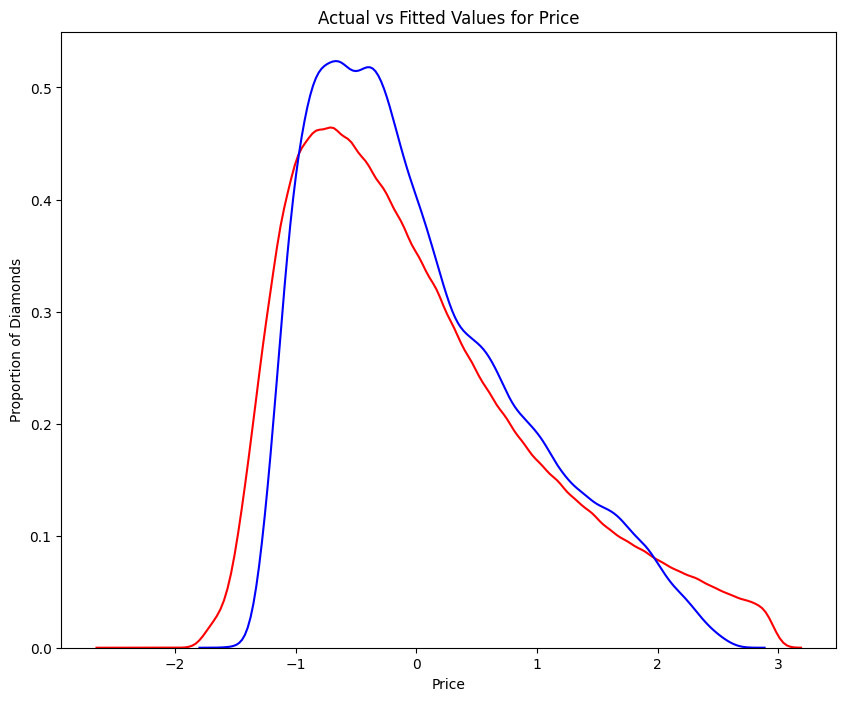

In [192]:
#distribution plot for actual and predicted values
plt.figure(figsize=(10,8))
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(rf_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [193]:
print('Random Forest Regressor RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Random Forest Regressor Accuracy:',rf.score(x_test,y_test))
print('Random Forest Regressor MAE:',mean_absolute_error(y_test,rf_pred))

Random Forest Regressor RMSE: 0.5248716586104079
Random Forest Regressor Accuracy: 0.7248950159076728
Random Forest Regressor MAE: 0.37691977911288344


### Feature Importance

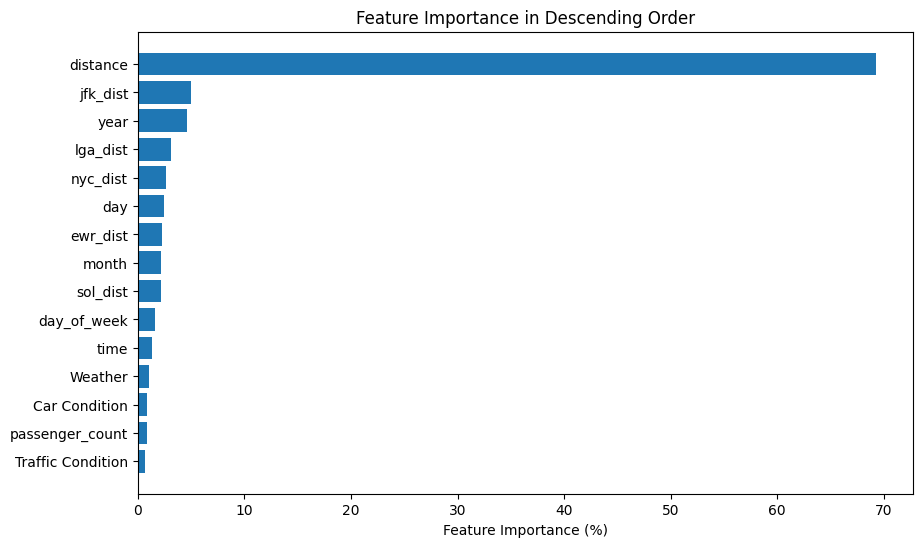

In [196]:
# Fit your model (RandomForestClassifier in this example)
model = RandomForestRegressor()
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_

# Get feature names (assuming X is a pandas DataFrame or you have a list of feature names)
feature_names = data3.columns.to_list()

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on sorted indices
sorted_feature_names = [feature_names[i] for i in indices]

# Sort the importances in descending order
sorted_importances = importances[indices]

# Convert importances to percentages
sorted_importances_percentage = sorted_importances * 100

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances_percentage, align='center')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Feature Importance (%)')
plt.title('Feature Importance in Descending Order')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()